In [ ]:
# !wget http://images.cocodataset.org/zips/val2017.zip
# !unzip val2017.zip

--2020-05-13 15:23:05--  http://images.cocodataset.org/zips/val2017.zip
52.216.184.51ges.cocodataset.org (images.cocodataset.org)... 
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.184.51|:80... connected.
200 OKequest sent, awaiting response... 
Length: 815585330 (778M) [application/zip]
Saving to: ‘val2017.zip’

val2017.zip         100%[===================>] 777.80M  52.8MB/s    in 14s     

2020-05-13 15:23:19 (56.5 MB/s) - ‘val2017.zip’ saved [815585330/815585330]



In [1]:
!pip install opencv-contrib-python

     |████████████████████████████████| 34.2MB 15.3MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import os
import re
import cv2
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from helper import save_obj, load_obj
from create_ground_truth_helper import *

In [5]:
import random
random.choice(os.listdir("/home/jovyan/work/val2017"))

'000000548246.jpg'

In [3]:
fx = 572.41140
px = 325.26110
fy = 573.57043
py = 242.04899
intrinsic_matrix = np.array([[fx, 0, px], [0, fy, py], [0, 0, 1]])

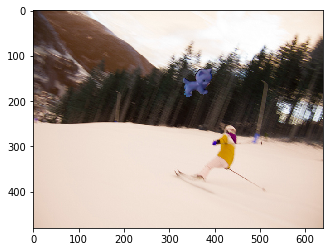

In [15]:
img_adr = "/home/jovyan/work/LineMOD_Dataset/cat/data/color0.jpg"
background_img_adr = "/home/jovyan/work/val2017/" + random.choice(os.listdir("/home/jovyan/work/val2017"))
label = os.path.split(os.path.split(os.path.dirname(img_adr))[0])[1]
regex = re.compile(r'\d+')
idx = regex.findall(os.path.split(img_adr)[1])[0]

image = cv2.imread(img_adr)
background_img = cv2.imread(background_img_adr)

background_img = cv2.resize(background_img,(image.shape[1], image.shape[0]), interpolation=cv2.INTER_AREA)
tra_adr = "/home/jovyan/work/LineMOD_Dataset/cat" + "/data/tra" + str(idx) + ".tra"
rot_adr = "/home/jovyan/work/LineMOD_Dataset/cat" + "/data/rot" + str(idx) + ".rot"
rigid_transformation = get_rot_tra(rot_adr, tra_adr)

# Read point Point Cloud Data
ptcld_file = "/home/jovyan/work/LineMOD_Dataset/cat/object.xyz"
pt_cld_data = np.loadtxt(ptcld_file, skiprows=1, usecols=(0, 1, 2))
ones = np.ones((pt_cld_data.shape[0], 1))
homogenous_coordinate = np.append(pt_cld_data[:, :3], ones, axis=1)

# Perspective Projection to obtain 2D coordinates for masks
homogenous_2D = intrinsic_matrix @ (
    rigid_transformation @ homogenous_coordinate.T)
coord_2D = homogenous_2D[:2, :] / homogenous_2D[2, :]
coord_2D = ((np.floor(coord_2D)).T).astype(int)
x_2d = np.clip(coord_2D[:, 0], 0, 639)
y_2d = np.clip(coord_2D[:, 1], 0, 479)

background_img[y_2d,x_2d,:] = [0,0,0]

background_img[y_2d,x_2d,:] = image[y_2d,x_2d,:]
plt.imshow(background_img)

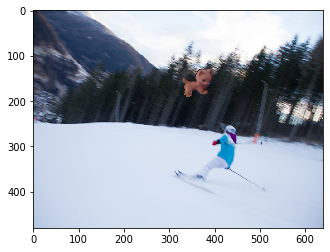

In [16]:
b,g,r = cv2.split(background_img)       # get b,g,r
rgb_img = cv2.merge([r,g,b])
plt.imshow(rgb_img)

In [8]:
background_img.shape

(480, 640, 3)